In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
df = pd.read_csv('DjMario_videos.csv')

In [3]:
# Reemplazar 'Subtitle not available' por valores nulos en la columna 'transcript'
df['transcript'] = df['transcript'].replace('Subtitle not available', pd.NA)

In [4]:
# Check for missing values
print(df.isnull().sum())

video_id         0
title            0
description      0
publish_date     0
likes            0
views            0
comments         0
transcript      76
dtype: int64


In [5]:
# Check for duplicates
print(df.duplicated().sum())

0


In [6]:
# Convert 'publish_date' to datetime format
df['publish_date'] = pd.to_datetime(df['publish_date'])

In [7]:
# Extract features from 'publish_date'
df['year'] = df['publish_date'].dt.year
df['month'] = df['publish_date'].dt.month
df['day_of_week'] = df['publish_date'].dt.dayofweek
df['hour'] = df['publish_date'].dt.hour

In [8]:
df['likes'] = pd.to_numeric(df['likes'], errors='coerce')
df['comments'] = pd.to_numeric(df['comments'], errors='coerce')
df['views'] = pd.to_numeric(df['views'], errors='coerce')

df['likes'] = df['likes'].fillna(0)
df['comments'] = df['comments'].fillna(0)
df['views'] = df['views'].fillna(1)


# Create 'engagement rate'
df['engagement_rate'] = (df['likes'] + df['comments']) / df['views']


In [9]:
# Descriptive statistics
print(df.describe())

              likes         views      comments         year       month  \
count  4.680000e+02  4.680000e+02    468.000000   468.000000  468.000000   
mean   7.135504e+04  1.376513e+06   1875.709402  2021.549145    6.425214   
std    9.147707e+04  2.035061e+06   3855.257294     1.044891    3.714196   
min    1.038900e+04  2.928160e+05     57.000000  2017.000000    1.000000   
25%    3.241650e+04  7.767550e+05    215.500000  2021.000000    3.000000   
50%    5.193250e+04  9.990520e+05    874.500000  2022.000000    6.000000   
75%    8.160425e+04  1.350598e+06   2136.000000  2022.000000   10.000000   
max    1.493243e+06  3.527614e+07  49689.000000  2023.000000   12.000000   

       day_of_week        hour  engagement_rate  
count   468.000000  468.000000       468.000000  
mean      2.634615   16.151709         0.054715  
std       2.002418    7.231005         0.022851  
min       0.000000    0.000000         0.014718  
25%       1.000000   15.000000         0.038089  
50%       3.000

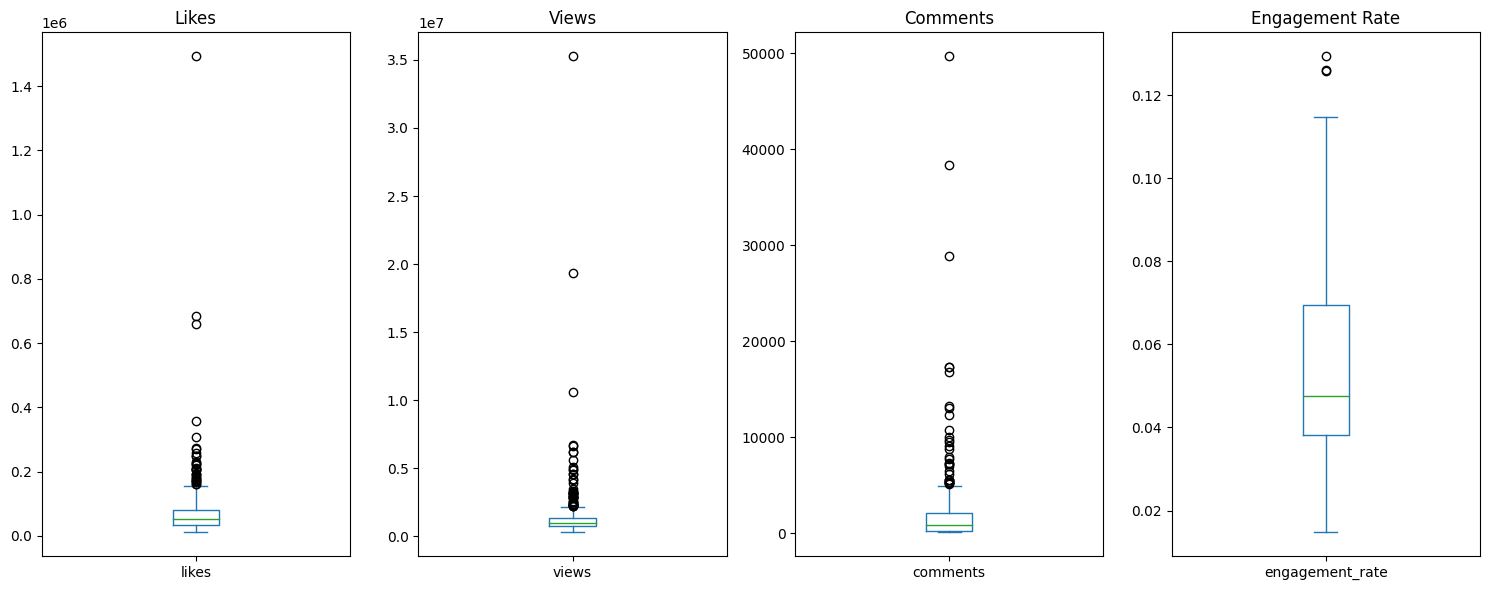

In [10]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 6))

# Create box plots for each column and place them in the subplots
df['likes'].plot(kind='box', ax=axes[0])
df['views'].plot(kind='box', ax=axes[1])
df['comments'].plot(kind='box', ax=axes[2])
df['engagement_rate'].plot(kind='box', ax=axes[3])

# Set titles for subplots
axes[0].set_title('Likes')
axes[1].set_title('Views')
axes[2].set_title('Comments')
axes[3].set_title('Engagement Rate')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

array([[<AxesSubplot: title={'center': 'likes'}>,
        <AxesSubplot: title={'center': 'views'}>],
       [<AxesSubplot: title={'center': 'comments'}>,
        <AxesSubplot: title={'center': 'engagement_rate'}>]], dtype=object)

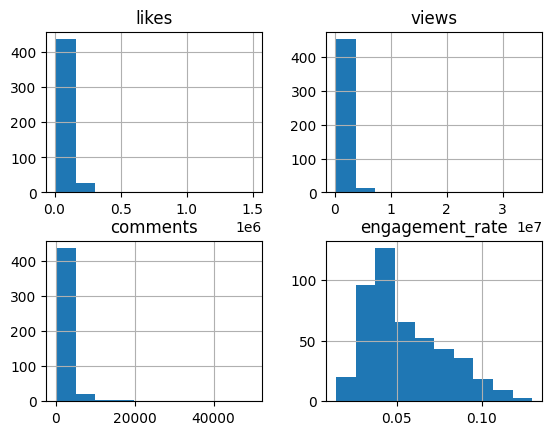

In [11]:
# Histograms
df[['likes', 'views', 'comments', 'engagement_rate']].hist()

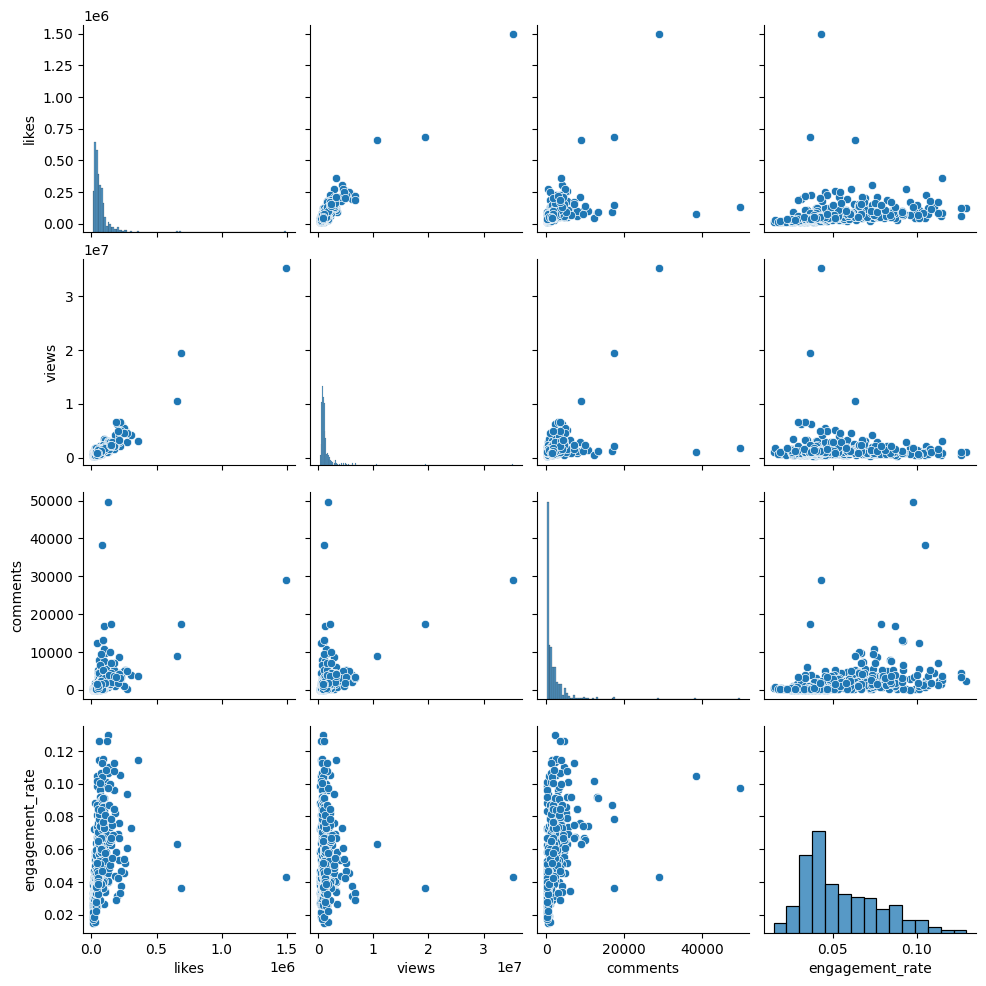

In [12]:
# Scatterplot matrix
sns.pairplot(df[['likes', 'views', 'comments', 'engagement_rate']])


<AxesSubplot: >

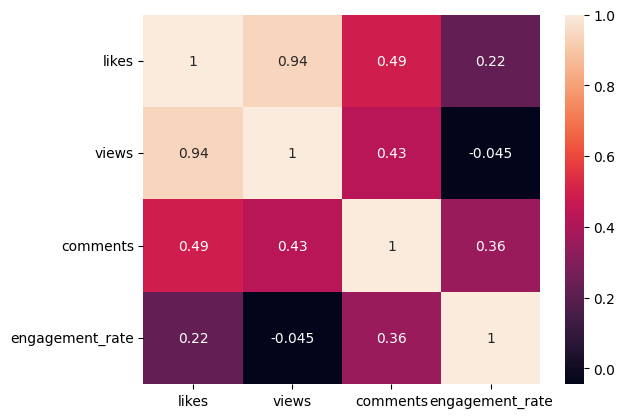

In [13]:
# Correlation matrix
corr_matrix = df[['likes', 'views', 'comments', 'engagement_rate']].corr()
sns.heatmap(corr_matrix, annot=True)

In [14]:
corr_matrix

,likes,views,comments,engagement_rate
likes,1.000000,0.940653,0.493753,0.221461
views,0.940653,1.000000,0.428667,-0.044947
comments,0.493753,0.428667,1.000000,0.357680
engagement_rate,0.221461,-0.044947,0.357680,1.000000


<AxesSubplot: xlabel='publish_date'>

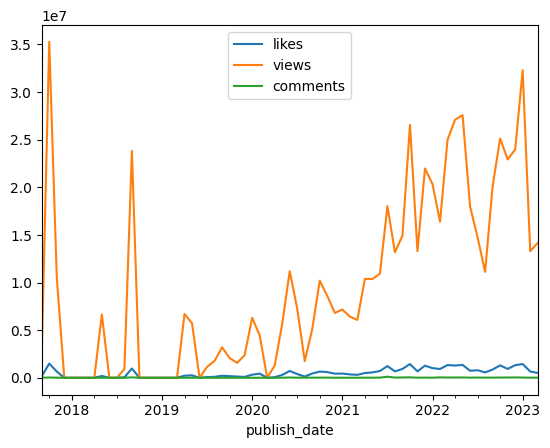

In [15]:
# Time series analysis
df.set_index('publish_date').resample('M')[['likes', 'views', 'comments']].sum().plot()

<AxesSubplot: xlabel='day_of_week'>

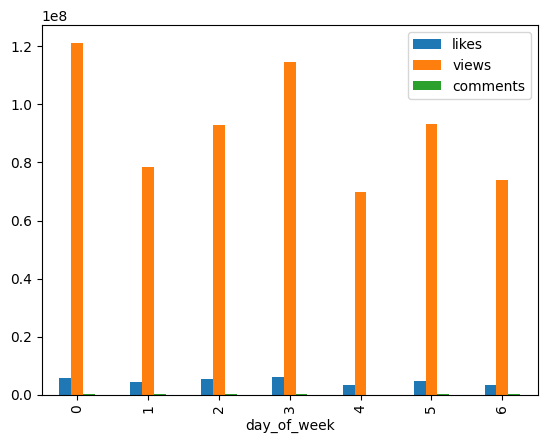

In [16]:
# Time series analysis by day of week
df.groupby('day_of_week')[['likes', 'views', 'comments']].sum().plot(kind='bar')

<AxesSubplot: xlabel='hour'>

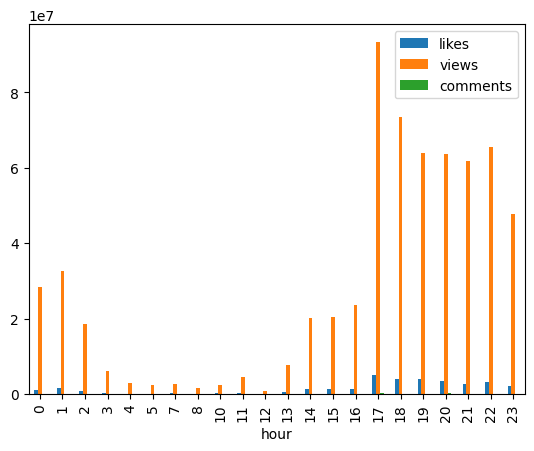

In [17]:
# Time series analysis by hour
df.groupby('hour')[['likes', 'views', 'comments']].sum().plot(kind='bar')

In [18]:
# Most popular videos
print(df[df['views'] == df['views'].max()]['title'])

466    DjMaRiiO vs CRISTIANO RONALDO
Name: title, dtype: object
